In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [16]:

# Load and scale data
df = pd.read_csv("/Users/tobitlouis/Downloads/S27FE-10K.csv")

X = df.drop('realized_volatility', axis=1)
y = df['realized_volatility']

scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


# Train/test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [17]:
# Use cross-validation to find optimal alpha
lasso_cv = LassoCV(alphas=np.logspace(-4, 1, 50),  # range of alpha values
                   cv=5,  # 5-fold cross-validation
                   random_state=42)

lasso_cv.fit(X_train_scaled, y_train)

# Best alpha found
best_alpha = lasso_cv.alpha_
print(f"Best alpha: {best_alpha}")

# Predict using the model trained with best alpha
y_pred_cv = lasso_cv.predict(X_test_scaled)

# Evaluation
mse_cv = mean_squared_error(y_test, y_pred_cv)
r2_cv = r2_score(y_test, y_pred_cv)

print("LassoCV Results:")
print(f"  MSE: {mse_cv:.4f}")
print(f"  R^2: {r2_cv:.4f}")

Best alpha: 0.0001
LassoCV Results:
  MSE: 0.0000
  R^2: 0.1232


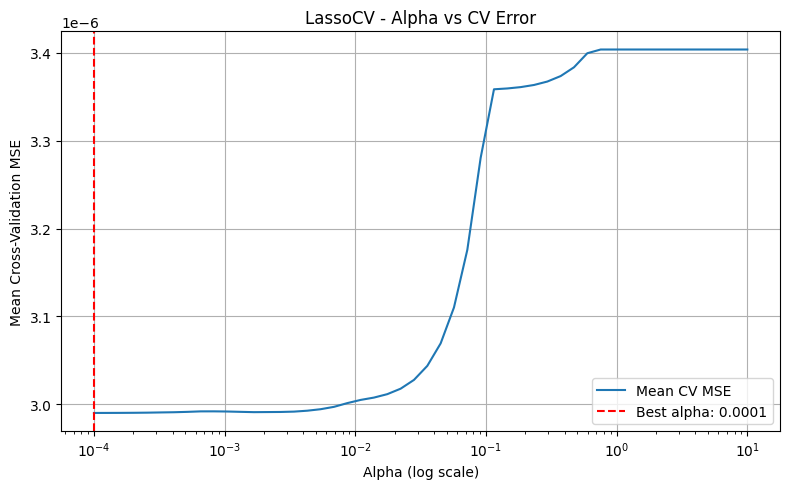

In [18]:
# Cross-Validation and MSE vs Alpha 
plt.figure(figsize=(8, 5))
plt.semilogx(lasso_cv.alphas_, np.mean(lasso_cv.mse_path_, axis=1), label='Mean CV MSE')
plt.axvline(best_alpha, linestyle='--', color='red', label=f'Best alpha: {best_alpha:.4f}')
plt.xlabel("Alpha (log scale)")
plt.ylabel("Mean Cross-Validation MSE")
plt.title("LassoCV - Alpha vs CV Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


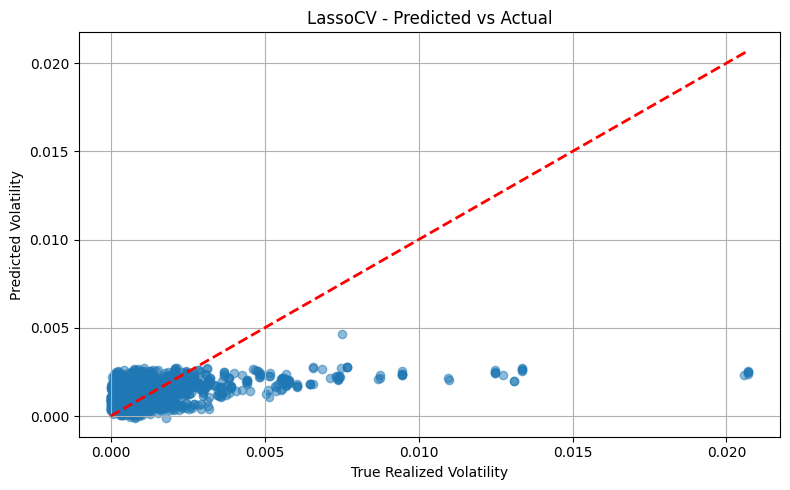

In [19]:
# True vs Predicted Volatlity
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred_cv, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Realized Volatility")
plt.ylabel("Predicted Volatility")
plt.title("LassoCV - Predicted vs Actual")
plt.grid(True)
plt.tight_layout()
plt.show()


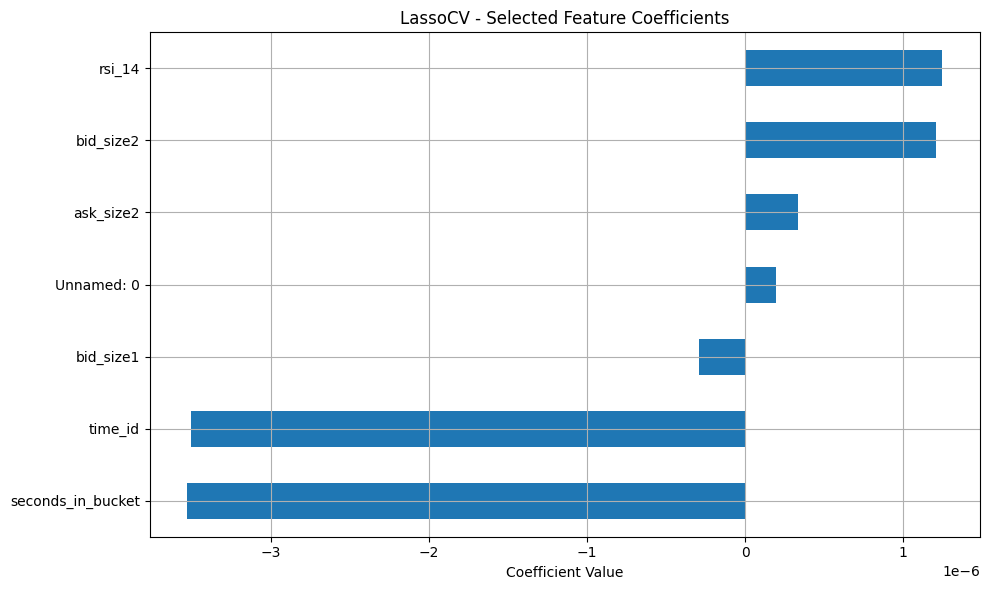

In [20]:
# Feature Coefficients 
coefs = pd.Series(lasso_cv.coef_, index=X.columns)
nonzero_coefs = coefs[coefs != 0]

plt.figure(figsize=(10, 6))
nonzero_coefs.sort_values().plot(kind='barh')
plt.title("LassoCV - Selected Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()
